In [174]:
#Parameters are the configuration model, which are internal to the model.
#Hyperparameters are the explicitly specified parameters that control the training process.
#Parameters are essential for making predictions. Hyperparameters are essential for optimizing the model.

- KNN:K Nearest Neighbours
- It is a supervised machine learning algorithm
- It is Based on distance metric like unsupervised ML
- KNN is a lazy algo.It will not create a math model from training data.
- It memorizes dataset but not discriminate data and based in distance it does classification/regression
- K majorly influences result.it is a important hyperparameter
- when new data comes for prediction, it distance is measured from every other data points and sort and get closest distance.
- now based on k ,based on k nearest /closest distance features ,and their labels average/majority is calculated if regression/classification
- distance is calculated on euclidean formula.for 2D , dist btw (x,y)&(a,b)=sqrt(sqr(x-a)+sqr(y-b))
- there are other distance formulas also like manhattan distance. but euclidean dist is famous
- k should not be large and good if it is odd(to avoid ties)
- The optimal K value usually found is the square root of N, where N is the total number of samples.But this is not accurate.so using other method as below

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,recall_score,accuracy_score,precision_score,f1_score

In [176]:
df=pd.read_csv("iris.csv")

In [177]:
df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [178]:
df["variety"]=df["variety"].astype("category")

In [179]:
df["variety"]=LabelEncoder().fit_transform(df["variety"])

In [180]:
scaler=MinMaxScaler()

In [181]:
df1=df.iloc[:,:-1]
y=df["variety"]
df=pd.DataFrame(scaler.fit_transform(df1),columns=df1.columns)
df["variety"]=y

In [182]:
df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,0.222222,0.625000,0.067797,0.041667,0
1,0.166667,0.416667,0.067797,0.041667,0
2,0.111111,0.500000,0.050847,0.041667,0
3,0.083333,0.458333,0.084746,0.041667,0
4,0.194444,0.666667,0.067797,0.041667,0
...,...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667,2
146,0.555556,0.208333,0.677966,0.750000,2
147,0.611111,0.416667,0.711864,0.791667,2
148,0.527778,0.583333,0.745763,0.916667,2


In [183]:
x=df.iloc[:,:-1]
y=df["variety"]

In [184]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [185]:
from sklearn.neighbors import KNeighborsClassifier
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test).ravel() #returns a flattened array
    error.append(np.mean(pred_i != (y_test)))

Text(0, 0.5, 'Mean Error')

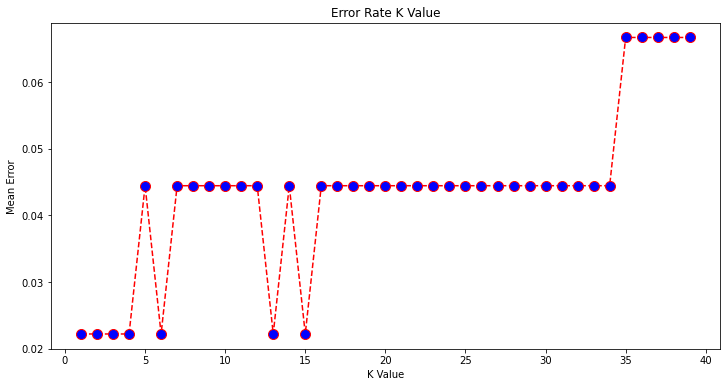

In [186]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [187]:
#building model with best k
model=KNeighborsClassifier(n_neighbors=3).fit(x_train,y_train)

In [188]:
y_pred=model.predict(x_test)

In [189]:
y_pred

array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 2, 1, 0, 0, 1, 2, 1, 2, 1, 2, 2, 0, 1, 0, 1, 2, 2, 0, 1, 2,
       1])

In [190]:
model.score(x_train,y_train)

0.9619047619047619

In [191]:
confusion_matrix(y_test,y_pred)

array([[14,  0,  0],
       [ 0, 18,  0],
       [ 0,  1, 12]], dtype=int64)

In [192]:
accuracy_score(y_test,y_pred)

0.9777777777777777

In [193]:
precision_score(y_test,y_pred,average="weighted")

0.9789473684210527

In [194]:
f1_score(y_test,y_pred,average="weighted")

0.9776336336336338

In [195]:
recall_score(y_test,y_pred,average="weighted")

0.9777777777777777

### Demo on how it works

In [196]:
import numpy as np
sweet_chrunchy = np.array([[10,9],[1, 4], [10, 1], [7, 10], [3, 10], [1, 1], [8, 5], [3, 7], [3, 6], [7, 3]])
ingredients = ["Apple", "Bacon", "Banana", "Carrot", "Celery", "Cheese", "Grape", "Green Bean", "Nuts","Orange"]
FoodType=["fruit", "protein", "fruit", "vegetable", "vegetable", "protein", "fruit", "vegetable", "protein", "fruit"]
test =[6, 4]


In [197]:
#euclidean distance using formula
def euclidean_distance(x, y):
    return np.sqrt(np.sum((x - y) ** 2))
for i in range(len(sweet_chrunchy)):
    distance = euclidean_distance(test, sweet_chrunchy[i])
    print("Distance between ",test," and ", sweet_chrunchy[i],"(",ingredients[i],") = ", distance)


Distance between  [6, 4]  and  [10  9] ( Apple ) =  6.4031242374328485
Distance between  [6, 4]  and  [1 4] ( Bacon ) =  5.0
Distance between  [6, 4]  and  [10  1] ( Banana ) =  5.0
Distance between  [6, 4]  and  [ 7 10] ( Carrot ) =  6.082762530298219
Distance between  [6, 4]  and  [ 3 10] ( Celery ) =  6.708203932499369
Distance between  [6, 4]  and  [1 1] ( Cheese ) =  5.830951894845301
Distance between  [6, 4]  and  [8 5] ( Grape ) =  2.23606797749979
Distance between  [6, 4]  and  [3 7] ( Green Bean ) =  4.242640687119285
Distance between  [6, 4]  and  [3 6] ( Nuts ) =  3.605551275463989
Distance between  [6, 4]  and  [7 3] ( Orange ) =  1.4142135623730951


In [199]:
from sklearn import preprocessing
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 'species'.
FoodType_encode= label_encoder.fit_transform(FoodType)
print(FoodType_encode)

[0 1 0 2 2 1 0 2 1 0]


In [200]:
from sklearn import neighbors
k=3
# learning the classifier
clf = neighbors.KNeighborsClassifier(k)
clf.fit(sweet_chrunchy, FoodType_encode)


KNeighborsClassifier(n_neighbors=3)

In [201]:
# Model Properties
print(clf.classes_)
print(clf.n_neighbors)


[0 1 2]
3


In [202]:
# Predict the test data
test=np.reshape(test, (1, -1), order='F')
predict= clf.predict(test)
predict


array([0], dtype=int64)

IndexError: index 1 is out of bounds for axis 0 with size 1

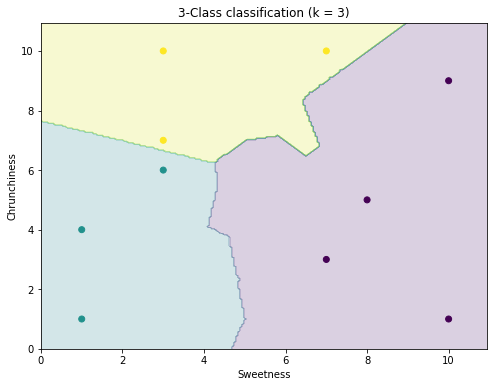

In [203]:
X = sweet_chrunchy
y = FoodType_encode
# Plot the decision boundary. Predict on a mesh
h = 0.05
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
# create a contour plot
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.2)
# Plot also the training points
plt.scatter(x=X[:, 0], y=X[:, 1], c=y)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("3-Class classification (k = %i)" % (k))
plt.xlabel("Sweetness")
plt.ylabel("Chrunchiness")
plt.scatter(test[0], test[1], c="red")
plt.show()


In [4]:
#example of how using header=none gives no columns name
aa=pd.read_csv("iris.csv",header=None)
aa.head()

,0,1,2,3,4
0,sepal.length,sepal.width,petal.length,petal.width,variety
1,5.1,3.5,1.4,.2,Setosa
2,4.9,3,1.4,.2,Setosa
3,4.7,3.2,1.3,.2,Setosa
4,4.6,3.1,1.5,.2,Setosa
